In [9]:
n_mfcc = 12
sr = 22050
filename_arr_test = 'audio/etc/test_arr_12.mp3'
filename_ir_test = 'audio/etc/test_ir_12.mp3'

In [10]:
%matplotlib inline
from pathlib import Path
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display

In [11]:
arr_signals = [
    librosa.load(p, duration=30, offset=10)[0] for p in Path().glob('audio/etc/arr_*.mp3')
]
ir_signals = [
    librosa.load(p, duration=30, offset=10)[0] for p in Path().glob('audio/etc/ir_*.mp3')
]

In [12]:
len(arr_signals)

10

In [13]:
len(ir_signals)

10

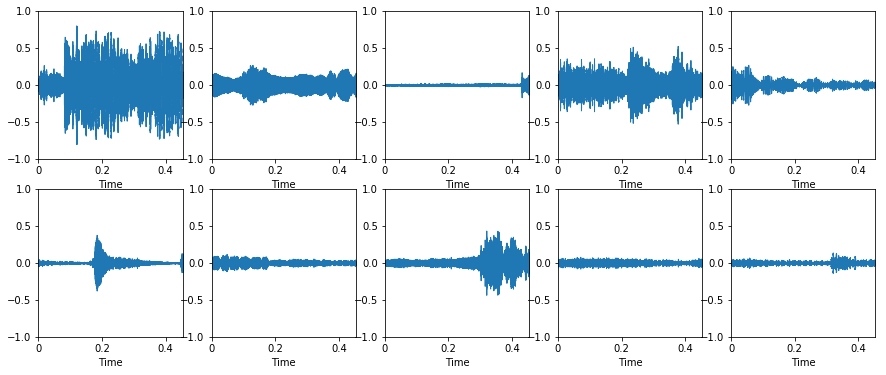

In [14]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(arr_signals):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

In [15]:
ipd.Audio(arr_signals[5], rate=22050)

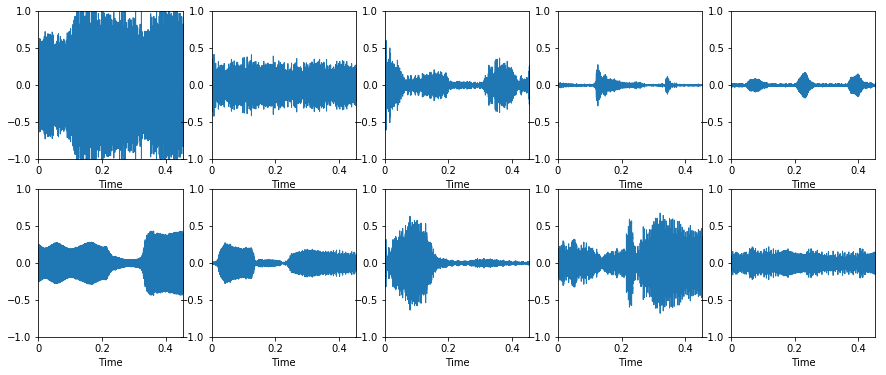

In [16]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(ir_signals):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

In [17]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
        librosa.feature.mfcc(signal, n_mfcc=n_mfcc).T[0, 0],
        librosa.feature.melspectrogram(signal)[0, 0]
    ]

In [18]:
arr_features = numpy.array([extract_features(x) for x in arr_signals])
ir_features = numpy.array([extract_features(x) for x in ir_signals])

In [19]:
print(arr_features.shape)
print(arr_features.shape)

(10, 4)
(10, 4)


In [20]:
#scaler = sklearn.preprocessing.StandardScaler()
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))

arr_features_scaled = scaler.fit_transform(arr_features)
print(arr_features_scaled.mean(axis=0))
print(arr_features_scaled.std(axis=0))

ir_features_scaled = scaler.transform(ir_features)
print(ir_features_scaled.mean(axis=0))
print(ir_features_scaled.std(axis=0))

[-0.28427673 -0.31230464 -0.01750565 -0.77035995]
[0.60807431 0.56289425 0.58461718 0.59188591]
[-0.5509434  -0.77084508  0.30673465  0.08329127]
[0.2756296  0.20455551 0.67644633 2.90938583]


In [21]:
features = numpy.vstack((arr_features_scaled, ir_features_scaled))
print(features.shape)
print(features.min(axis=0))
print(features.max(axis=0))

(20, 4)
[-1.         -1.09390314 -1.         -1.        ]
[1.         1.         1.20949386 8.79420426]


In [22]:
labels = numpy.concatenate((numpy.zeros(len(arr_features_scaled)), numpy.ones(len(ir_features_scaled))))

In [23]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [24]:
# Support Vector Machine
model = sklearn.svm.SVC()

In [25]:
model.fit(features, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
x_arr_test, sr_arr_test = librosa.load(filename_arr_test, duration=10, offset=120)
x_ir_test, sr_ir_test = librosa.load(filename_ir_test, duration=10, offset=120)

In [27]:
ipd.Audio(x_arr_test, rate=sr_arr_test)

In [28]:
ipd.Audio(x_ir_test, rate=sr_ir_test)

In [29]:
#arr_features = numpy.array([extract_features(x) for x in arr_signals])
#ir_features = numpy.array([extract_features(x) for x in ir_signals])
arr_features_test = numpy.array([extract_features(x_arr_test)])
ir_features_test = numpy.array([extract_features(x_ir_test)])

In [30]:
print(arr_features_test.shape)
print(ir_features_test.shape)

(1, 4)
(1, 4)


In [31]:
arr_features_test_scaled = scaler.transform(arr_features_test)
ir_features_test_scaled = scaler.transform(ir_features_test)

In [32]:
features_test = numpy.vstack((arr_features_test_scaled, ir_features_test_scaled))

In [33]:
labels_test = numpy.concatenate((numpy.zeros(len(arr_features_test)), numpy.ones(len(ir_features_test))))

In [34]:
labels_test

array([0., 1.])

In [35]:
predicted_labels = model.predict(features_test)

In [36]:
predicted_labels

array([1., 1.])

In [37]:
score = model.score(features_test, labels_test)

In [38]:
score

0.5